## <font color=blue>**Importing necessary libraries and packages**</font>

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style
import seaborn as sns
import nltk #Natural Language Toolkit
#To ignore warnings
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [69]:
df=pd.read_csv("C:\\Users\\INFOKOM\\Desktop\\fida\\Email Spam Classifier\\mail_data.csv")

In [70]:
print(df)

     Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [71]:
data=df.where(pd.notnull(df), '')

In [72]:
print(data)

     Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [73]:
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [74]:
data.tail()

,Category,Message
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


## <font color=blue>**Exploratory Data Analysis**</font>

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [76]:
data.shape

(5572, 2)

In [77]:
#Let's check the length of the dataset
print(" Total number of rows in the dataset are", len(df))

 Total number of rows in the dataset are 5572


In [78]:
#Descriptive Summary of the dataset
data.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


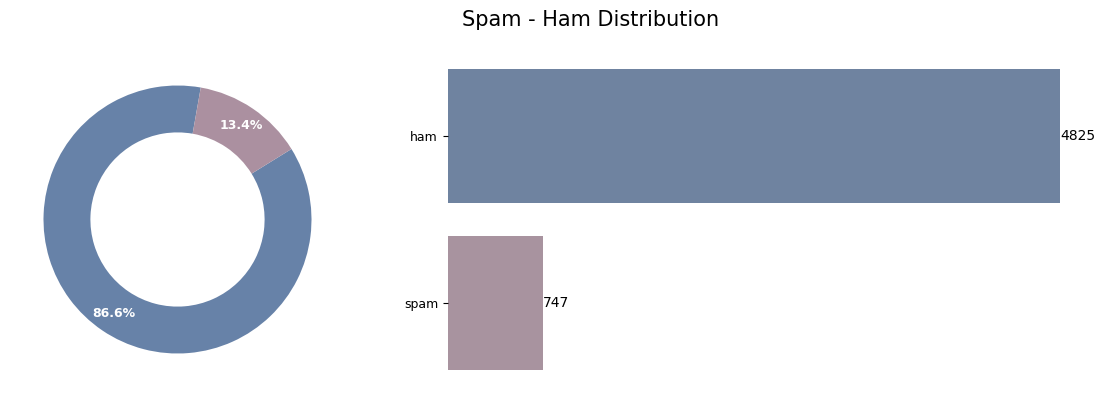

- The dataset has 4825 emails (86.6%) labled as Ham while 747 (13.4%) labaled as Spam.
- "ham" is the predominant category.
- The dataset contains 5,169 unique texts.
- The most frequent text being "Sorry, I'll call later," occurring 30 times.

In [79]:
#Let's create a column to check of each text & plot a histogram to check the distirbution
data['Length']=data['Message'].apply(len)
display(data.head())

#distribution of the data
import plotly.express as px
fig = px.histogram(data, x='Length', marginal='rug',
                   title='Histogram of Message Length')
fig.update_layout(
    xaxis_title='Length',
    yaxis_title='Frequency',
    showlegend=True)

,Category,Message,Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


- <font color=orange>**The Plotly Express library**</font> is a high-level interface for creating a variety of interactive plots in Python.
- <font color=orange>**marginal='rug'**</font> adds small tick marks along the x-axis (rug plot) to show the distribution of individual data points.
- <font color=orange>**showlegend=True**</font> specifies that the legend should be displayed (although, in a histogram, there typically isn't a legend because there's only one dataset being plotted).

In [80]:
#Lets check the distribution against categories
import plotly.express as px
fig = px.histogram(data, x='Length', color='Category', marginal='rug',
                   title='Histogram of Message Length by Category')
fig.update_layout(
    xaxis_title='Length',
    yaxis_title='Frequency',
    showlegend=True)

- <font color=orange>**color='Category'**</font> divise les données en fonction des catégories de la colonne 'Category' et colore les barres d'histogramme en conséquence.

In [81]:
#Let's Label the data as 0 & 1 i.e. Spam as 1 & Ham as 0
data.loc[:,'Category']=data.Category.map({'ham':0, 'spam':1})
data['Category'] = data['Category'].astype(int)
data.head()

,Category,Message,Length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


la méthode <font color=orange>**map**</font> pour mapper chaque valeur de la colonne 'Category' à la valeur correspondante dans le dictionnaire spécifié

In [82]:
#other method
data.loc[data['Category']== 'spam','Category',]==1
data.loc[data['Category']== 'ham','Category',]==0

Series([], Name: Category, dtype: bool)

In [83]:
X=data['Message']
Y=data['Category']

In [84]:
print(X)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object


In [85]:
print(Y)

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: Category, Length: 5572, dtype: int32
